# IDS Assignment 2
Document your results as well as the way you obtained them in this jupyter notebook. A seperate report (pdf, word etc.) is _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. 

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file in moodle.

# Preprocessing and Data Quality 


###Question 1 (Order cancellations)
Invoices with a InvoiceNo starting with the letter ‘c’ are order cancellations. Would you recommend keeping the order cancellation in your data set? Also provide a reason for your recommandation. 

Your answer:

In my opinion, the cancelled invoices should be discarded.

The reason for this decision is that the cancelled invoices do not contribute to the buyers' shopping behaviors.


If the point of this analyze is to find why people cancel their orders, then only cancelled invoices should be included and not successful ones should be discarded: this way, we can analyze why an order is cancelled and what can be done to prevent it, increasing the revenue.

However, we want to analyze the consumer behavior, and cancelled invoices can be thrown out of the equation, for the reasons stated above.

In [1]:
#Modify the data set according to your recommendation
import numpy as np
import pandas as pd

# it takes some time to read excel file(23 MB)
fileName = "Online Retail.xlsx"
df = pd.read_excel(fileName, sheet_name=None)
df = df["Online Retail"]
print("Read Excel File [DONE]")

Read Excel File [DONE]


In [2]:
allInvoices = df["InvoiceNo"];
print("All      : ", len(allInvoices))
print("Uniques  : ", int(allInvoices.nunique()))
print()

startingWithC = [str(invoiceNo)[1:] \
                 for index,invoiceNo in df["InvoiceNo"].iteritems() if str(invoiceNo)[0] == "C"]
startingWithC = pd.DataFrame(startingWithC, columns = ["InvoiceNo"] )
print("Cancelled: ", len(startingWithC))
print("Uniques  : ", int(startingWithC.nunique()))
type(startingWithC.nunique())

print("Uniq Ratio: ", float(int(startingWithC.nunique())) / int(allInvoices.nunique()) )


acceptedInvoices = df[ df["InvoiceNo"].astype(str).str.contains('C') == False ]

print()
print("Use: acceptedInvoices, length: ", len(acceptedInvoices))


All      :  541909
Uniques  :  25900

Cancelled:  9288
Uniques  :  3836
Uniq Ratio:  0.14810810810810812

Use: acceptedInvoices, length:  532621


###Question 2 (Empty values)
The attributes Description and CustomerID contain empty values. The Country attribute contains an “unspecified” value. For each of the three attributes reason how you would handle these values and why. 

Your answer:

These are the number of rows that contain empty or "unspecified" value in the dataset, respective of the field that they contain those values: <br>
Desc, ID, Country:  
1454 133243 244

My decision would be to remove the rows that has missing or unspecified values. <br>
Number of rows before deleting: 532621 <br>
Number of rows after deleting : 397680

First of all, those that are deleted only contribute to the 25.3% of the total number of the rows. <br>
That is to say, they do not hurt the completeness that much.

Furthermore, analyzing each field:

Description: this field would be important in assessing what a specific product ID points to. <br>
Having this field empty means we might find a product ID that is sold extensively, yet, <br>
we cannot pinpoint what this product is, diminishing our effects.


CustomerID: although CustomerID field may not effect our work on finding the customer behavior of the whole, I decided it is better to remove them. <br>
The reason for this is that, I might need customer ID to tailor targeted ads to a specific customer. <br>
However, without having CustomerID field intact, I cannot produce this information. <br>
(all assuming that this data is collected with customers' written consent and it does not violate any laws in any way when tailoring targeted ads to customers.)

Country: The data might be used to find the customer behavior of a specific country. <br>
(in fact, later in the assignment we check for "United Kingdom"'s customer behavior) <br>
For this reason, rows without their country stated will not help us in our cause, leading to removal of those rows.

In [3]:
#Modify the data set according to your recommendation
from copy import deepcopy

def handleValuesSpitNewDataset2(pandaObject):
    deepCopied = pandaObject
    featureList = deepCopied.columns
    print("Full     : ", len(deepCopied))
    
    acceptedRows = []
    passDesc = 0
    passID = 0
    passCountry = 0
    for index, row in deepCopied.iterrows():
        if index % 100000 == 0:
            print(index)
        
        # empty Description feature
        desc = row["Description"]
        if isinstance(desc, str): # string valid
            pass
        elif np.isnan(desc): # nan invalid
            passDesc += 1
            continue
        else: # uncaught type, allow
            pass
        
        # empty CustomerID feature
        cid = row["CustomerID"]
        if np.isnan(cid): # nan invalid
            passID += 1
            continue
        else: # uncaught type, allow
            pass
        
        country = row["Country"]
        if country == "Unspecified":
            passCountry += 1
            continue
        else:
            pass
        
        acceptedRows.append(row)

    print("Pass Desc, ID, Country: ", passDesc, passID, passCountry )
    
    deepCopied = pd.DataFrame(acceptedRows, columns = featureList)
    print("Eliminated:", len(deepCopied))
    
    return deepCopied

handledDataset = handleValuesSpitNewDataset2(acceptedInvoices)

Full     :  532621
0
100000
200000
300000
400000
500000
Pass Desc, ID, Country:  1454 133243 244
Eliminated: 397680


###Question 3 (Outliers/Noise)
Explore into the attributes Quantity and UnitPrice by plotting each attribute visually. Do these attributes contain noise and/or outliers? If so, reason how you would handle them and modify your data set accordingly.


Whiskers for quantity:  [1.0, 27.0]
Whiskers for unitPrice:  [0.0, 7.5]


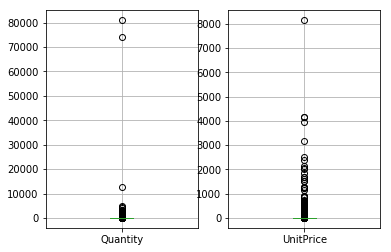

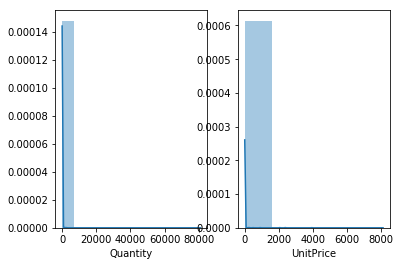

In [4]:
#Your code
%matplotlib inline
import matplotlib.pyplot as plt
from copy import deepcopy
import seaborn as sns

def getWhiskers(boxplotObject):
    whiskersList = []
    for internalRepresentation in boxplotObject['whiskers']:
        oneWhisker = internalRepresentation.get_ydata()
        # oneWhisker format = [lastValue in rectangle box, whiskerValue]
        # we need whiskerValue here
        whiskerValue = oneWhisker[1]
        whiskersList.append(whiskerValue)
    return sorted(whiskersList)

def drawBoxplots(pandaObject):
    fig2, axs2 = plt.subplots(1,2)
    fig3, axs3 = plt.subplots(1,2)
    
    plotQuantity = pandaObject.boxplot(column=["Quantity"], return_type="dict", ax= axs2[0])
    quantityWhiskers = getWhiskers(plotQuantity)
    print("Whiskers for quantity: ", quantityWhiskers)
    
    plotUnitPrice = pandaObject.boxplot(column=["UnitPrice"], return_type="dict", ax=axs2[1])
    unitPriceWhiskers = getWhiskers(plotUnitPrice)
    print("Whiskers for unitPrice: ", unitPriceWhiskers)
    
    sns.distplot(pandaObject["Quantity"], bins=12, ax=axs3[0])
    sns.distplot(pandaObject["UnitPrice"], bins=5, ax=axs3[1])
    
        
def clearOutliers(pandaObject, _featureList):
    # find whisker values
    plotQuantity = pandaObject.boxplot(column=["Quantity"], return_type="dict")
    quantityWhiskers = getWhiskers(plotQuantity)
    # print("Whiskers for quantity: ", quantityWhiskers)
    
    plotUnitPrice = pandaObject.boxplot(column=["UnitPrice"], return_type="dict")
    unitPriceWhiskers = getWhiskers(plotUnitPrice)
    # print("Whiskers for unitPrice: ", unitPriceWhiskers)
    
    # deep copy the structure, to be on the safe side
    deepCopiedPanda = deepcopy(pandaObject)
    
    # remove outliers for "Quantity"
    qLow, qHigh = quantityWhiskers
    deepCopiedPanda = deepCopiedPanda[ deepCopiedPanda["Quantity"] >= qLow ]
    deepCopiedPanda = deepCopiedPanda[ deepCopiedPanda["Quantity"] <= qHigh ]
    
    # remove outliers for "UnitPrice"
    unitLow, unitHigh = unitPriceWhiskers
    deepCopiedPanda = deepCopiedPanda[deepCopiedPanda["UnitPrice"] >= unitLow ]
    deepCopiedPanda = deepCopiedPanda[deepCopiedPanda["UnitPrice"] <= unitHigh ]
    
    # return the filtered panda set
    return deepCopiedPanda

# this graphs below are before removing outliers
drawBoxplots(handledDataset)

Whiskers for quantity:  [1.0, 27.0]
Whiskers for unitPrice:  [0.0, 5.49]
337969


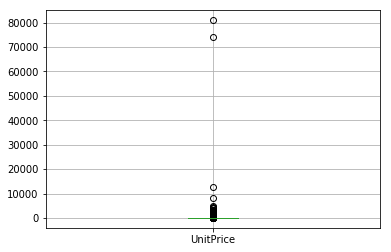

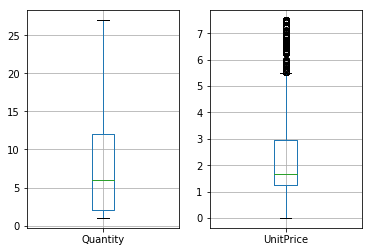

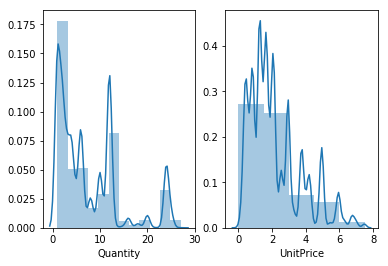

In [5]:
# this graphs below are after removing outliers
clearedDataset = clearOutliers(handledDataset, ["Quantity", "UnitPrice"])
drawBoxplots(clearedDataset)
print(len(clearedDataset))

Your explanation:

Attributes Quantity and UnitPrice sure contains noise.<br>
Some examples: <br>
* Invoice that is not cancelled, yet has enormous value in Quantity field  (there are a lot of rows)<br>
556690	23005	printing smudges/thrown away	-9600	6/14/2011 10:37	0		United Kingdom <br>
* UnitPrice of 0 (there are a lot of rows) <br>
537197	22841	ROUND CAKE TIN VINTAGE GREEN	1	12/5/2010 14:02	0	12647	Germany

Attributes Quantity and UnitPrice sure also contains outliers.<br>
(look at the graphs two cells above)

I will just stick to the old classic outlier removal method (standard quartile and whisker measures used).
After removing outliers, it is visible in the cell above that both Quantity and UnitPrice columns are cleaned of negative values, zero values, or enormous values.

So no extra operation is applied on the dataset.

#Visualization

Unfortunately, visualization is done in the cells above. <br>
Please refer to them, not this cell.

###Question 4 (Stream graph)
Create a stream graph that visualizes the number  of purchases (invoices) per country over time.

4. (a) Modify the data set to only contain purchases made in the countries Belgium, Ireland (EIRE), France, Germany, the Netherlands, Norway, Portugal, Spain and Switzerland.

In [6]:
#your modification
def countryFilterSpitNew(pandaObject, countryList):
    acceptedRows = []
    for index, row in pandaObject.iterrows():
        if row["Country"] in countryList:
            acceptedRows.append(row)
    newObject = pd.DataFrame(acceptedRows, columns = pandaObject.columns)
    return newObject

cList = ["Belgium", "EIRE", "France", "Germany",
         "Netherlands", "Norway", "Portugal", "Spain", "Switzerland"]
cFilteredDataset = countryFilterSpitNew(clearedDataset, cList)

print(len(cFilteredDataset))
countries = cFilteredDataset["Country"].unique()
countries.sort()
print(countries)

27611
['Belgium' 'EIRE' 'France' 'Germany' 'Netherlands' 'Norway' 'Portugal'
 'Spain' 'Switzerland']


4. (b) Modify the data set such that it shows per month for each country how many purchases were made (i.e. how many invoices were created).

In [7]:
#your modification
monthsNameDict = { 
    1: 'January', 2: 'February', 3 : 'March', 4 : 'April',
    5 : 'May',6 : 'June', 7 : 'July', 8 : 'August', 
    9 : 'September', 10 : 'October', 11 : 'November', 12 : 'December'
}
monthNameList = ['January', 'February', 'March', 'April',
    'May','June', 'July', 'August', 
    'September', 'October', 'November', 'December']

monthsIntList = [0,1,2,3,4,5,6,7,8,9,10,11,12]

def groupCountryMonth(pandaObject, countryList):
    cDict = {}
    # generate country-month-purchases dictionary
    for c in countryList:
        cDict[c] = {}
        for i in range(1,13):
            cDict[c][monthsNameDict[i]] = 0
    
    invoiceList = []
    for index, row in pandaObject.iterrows():
        # format: 12/1/2010 9:09
        monthInt = row["InvoiceDate"].month
        monthName = monthsNameDict[monthInt]
        country = row["Country"]
        
        # invoice has to be unique
        invoiceNo = row["InvoiceNo"]
        if invoiceNo not in invoiceList:
            cDict[country][monthName] = cDict[country][monthName] + 1
            invoiceList.append(invoiceNo)
    
    return cDict

print(len(cFilteredDataset))
CMDict = groupCountryMonth(cFilteredDataset, cList)

tot = 0
for x in CMDict:
    for y in CMDict[x]:
         tot += CMDict[x][y]
print(tot)

27611
1390


4. (c) Use the modified data to create a stream graph. 

In [8]:
#your code
country_MonthList_Dict = {}
# for country in cList:
#     print(country + " :",)
#     for month in monthNameList:
#         print("	", month, ":", CMDict[country][month])
#     print()
    
for country in cList:
    country_MonthList_Dict[country] = []
    for month in monthNameList:
        country_MonthList_Dict[country].append( CMDict[country][month] )
print(country_MonthList_Dict)

{'Belgium': [3, 8, 9, 6, 8, 11, 5, 8, 6, 11, 9, 9], 'EIRE': [7, 9, 18, 11, 18, 23, 19, 16, 31, 26, 37, 23], 'France': [27, 21, 24, 11, 36, 28, 22, 24, 43, 28, 61, 37], 'Germany': [30, 18, 30, 19, 40, 23, 31, 36, 40, 54, 61, 44], 'Netherlands': [3, 4, 7, 2, 7, 10, 1, 3, 7, 8, 9, 4], 'Norway': [0, 2, 3, 0, 0, 3, 1, 2, 6, 7, 5, 5], 'Portugal': [4, 2, 4, 2, 1, 3, 3, 1, 3, 6, 7, 10], 'Spain': [7, 4, 7, 3, 4, 8, 8, 9, 8, 8, 12, 5], 'Switzerland': [3, 4, 2, 2, 3, 4, 5, 3, 5, 5, 5, 2]}


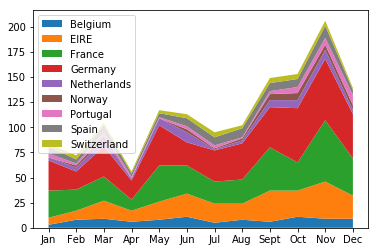

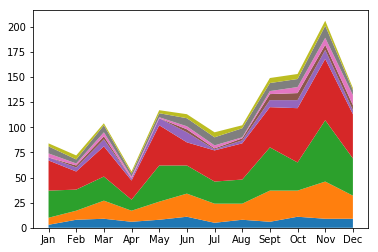

In [9]:
import numpy as np
import matplotlib.pyplot as plt

allCMList = []
for country in cList:
    allCMList.append(country_MonthList_Dict[country])
    
Belgium =  country_MonthList_Dict["Belgium"]
EIRE = country_MonthList_Dict["EIRE"]
France = country_MonthList_Dict["France"]
Germany = country_MonthList_Dict["Germany"]
Netherlands=  country_MonthList_Dict["Netherlands"]
Norway = country_MonthList_Dict["Norway"]
Portugal= country_MonthList_Dict["Portugal"] 
Spain = country_MonthList_Dict["Spain"]
Switzerland = country_MonthList_Dict["Switzerland"]

x = ['Jan', 'Feb', 'Mar', 'Apr',
    'May','Jun', 'Jul', 'Aug', 
    'Sept', 'Oct', 'Nov', 'Dec']
y = np.vstack(
    [Belgium, EIRE, France, Germany, 
     Netherlands, Norway, Portugal, 
     Spain, Switzerland]
)

labels = ["Belgium", "EIRE", "France", "Germany",
          "Netherlands", "Norway", "Portugal", 
           "Spain", "Switzerland"]

fig, ax = plt.subplots()
ax.stackplot(x, 
             Belgium, EIRE, France, Germany, 
             Netherlands, Norway, Portugal, 
             Spain, Switzerland, 
             labels=labels)
ax.legend(loc='upper left')
plt.show()

fig, ax = plt.subplots()
ax.stackplot(x, y)

4. (d) Use this graph to compare the purchases made by each country. 

Your answer:

It can be seen from the graph that the Germany dominates the number of invoices created. <br>
Then comes the France and and EIRE, sharing the top 3 places. <br>

The remaining countries, compared to top 3, are relatively small in their number of invoices created, individually. <br>

The order of the remaining ones based on their number of invoices created is as follows(decreasing order):<br>
Belgium, Spain, Netherlands, Portugal, Switzerland, Norway. <br>


For a full list:
* Germany 426
* France 362
* EIRE 238
* Belgium 93
* Spain 83
* Netherlands 65
* Portugal 46
* Switzerland 43
* Norway 34

One can also find country-month-number_of_invoice_created relation here:

{ <br>

    'Belgium': [3, 8, 9, 6, 8, 11, 5, 8, 6, 11, 9, 9],
    'EIRE': [7, 9, 18, 11, 18, 23, 19, 16, 31, 26, 37, 23], 
    'France': [27, 21, 24, 11, 36, 28, 22, 24, 43, 28, 61, 37], 
    'Germany': [30, 18, 30, 19, 40, 23, 31, 36, 40, 54, 61, 44], 
    'Netherlands': [3, 4, 7, 2, 7, 10, 1, 3, 7, 8, 9, 4], 
    'Norway': [0, 2, 3, 0, 0, 3, 1, 2, 6, 7, 5, 5], 
    'Portugal': [4, 2, 4, 2, 1, 3, 3, 1, 3, 6, 7, 10], 
    'Spain': [7, 4, 7, 3, 4, 8, 8, 9, 8, 8, 12, 5],
    'Switzerland': [3, 4, 2, 2, 3, 4, 5, 3, 5, 5, 5, 2]
    
 } <br>

Also note that some countries share similar patterns in their month-invoice graphs. <br>
For example, for the most of the countries, from January to February, the amount of invoice created decreases. <br>

Similar patterns can be seen if countries are coupled, yet, <br>
the aim of the question is not comparison of countries in groups of two based on increase/decrease in the number of invoices created by them.

### Question 5 (Heat map)
Create a heat map that visualizes how much (in sterling) each country purchases per month. 

5. (a) Modify the data set to only contain purchases made in the countries Belgium, Ireland (EIRE), France, Germany, the Netherlands, Norway, Portugal, Spain and Switzerland. (Or use the version of the data set that you created for question 4 a).

In [10]:
#your modification

# using dataset named: cFilteredDataset
# from 4a

5. (b) Modify the data set such that it shows per month how much money (in sterling) was spent in the shop per country.

In [11]:
#your modification

cNames = ["Belgium", "EIRE", "France", "Germany",
          "Netherlands", "Norway", "Portugal", 
           "Spain", "Switzerland"]

mNames = ['January', 'February', 'March', 'April',
    'May','June', 'July', 'August', 
    'September', 'October', 'November', 'December']


# create a dictionary for in the form:
# {
#    "countryName": { "monthName": purchaseTotal, ...},
#    ....
# }

# generate an empty dictionary of the form above
c_sterling_dict = {}
for country in cNames:
    # country_month_dict
    newDict = {}
    for month in mNames:
        newDict[month] = 0
    c_sterling_dict[country] = newDict

# populate the dictionary
# calculate how much is spent per country-month basis
for index, row in cFilteredDataset.iterrows():
    country = row["Country"]
    monthInt = row["InvoiceDate"].month # month in int
    month = monthsNameDict[monthInt]    # month in string
    invoiceCost = row["UnitPrice"] * row["Quantity"]
    c_sterling_dict[country][month] += invoiceCost

# just convert to integer, as we are working with big numbers
for country in c_sterling_dict:
    for month in c_sterling_dict[country]:
        c_sterling_dict[country][month] = int(c_sterling_dict[country][month])

# for country in c_sterling_dict:
#     print(country)
#     print("  ", c_sterling_dict[country])
#     print()

5. (c) Use the modified data to create a heat map. 

In [14]:
#your code
import seaborn as sns

# flights = sns.load_dataset("flights")
# flights = flights.pivot("month", "year", "passengers")
# ax = sns.heatmap(flights)

# convert dictionary into list
c_sterling_list = []
for country in c_sterling_dict:
    newList = [country]
    for month in c_sterling_dict[country]:
        newList.append(c_sterling_dict[country][month])
    c_sterling_list.append(newList)
    
# print(c_sterling_list)

# convert list into Pandas dataframe
# cmdf => country - month data frame
cmdf = pd.DataFrame(c_sterling_list, columns=("Country", 'January', 'February', 'March', 'April',
    'May','June', 'July', 'August', 
    'September', 'October', 'November', 'December'))

heatmap = cmdf.style.background_gradient(cmap='Reds')

heatmap

,Country,January,February,March,April,May,June,July,August,September,October,November,December
0,Belgium,768,1511,2248,1580,1766,3283,1697,2449,2711,3746,3811,2264
1,EIRE,1887,4546,7782,3839,8131,7821,7894,8377,16349,12207,16603,10521
2,France,10528,6318,7440,2887,10588,8888,6765,8328,16358,11079,20761,12091
3,Germany,11221,4892,7955,7021,11870,9027,11223,12235,12081,20639,16852,13113
4,Netherlands,1851,930,847,140,1441,2299,11,1386,2662,1459,1255,1291
5,Norway,0,522,311,0,0,2682,643,1010,4091,2056,3046,3756
6,Portugal,2129,890,1862,1378,544,738,1739,499,1138,4204,1734,3603
7,Spain,4864,1236,2746,1229,1511,2161,1535,2341,3503,3574,4199,939
8,Switzerland,2305,1431,685,1052,2484,2143,1642,3961,2739,5729,4554,1061


5. (d) Compare the amount of the purchases over time and between each country. 

Your answer:

Here are the volumes(€) of purchases made by countries each  month.


{ <br>

    'Belgium': [768, 1511, 2248, 1580, 1766, 3283, 1697, 2449, 2711, 3746, 3811, 2264], 
    'EIRE': [1887, 4546, 7782, 3839, 8131, 7821, 7894, 8377, 16349, 12207, 16603, 10521], 
    'France': [10528, 6318, 7440, 2887, 10588, 8888, 6765, 8328, 16358, 11079, 20761, 12091], 
    'Germany': [11221, 4892, 7955, 7021, 11870, 9027, 11223, 12235, 12081, 20639, 16852, 13113], 
    'Netherlands': [1851, 930, 847, 140, 1441, 2299, 11, 1386, 2662, 1459, 1255, 1291], 
    'Norway': [0, 522, 311, 0, 0, 2682, 643, 1010, 4091, 2056, 3046, 3756], 
    'Portugal': [2129, 890, 1862, 1378, 544, 738, 1739, 499, 1138, 4204, 1734, 3603], 
    'Spain': [4864, 1236, 2746, 1229, 1511, 2161, 1535, 2341, 3503, 3574, 4199, 939], 
    'Switzerland': [2305, 1431, 685, 1052, 2484, 2143, 1642, 3961, 2739, 5729, 4554, 1061]
}

(note: used "from scipy.stats.stats import pearsonr" between year list of each countries) <br>
(
    e.g. 

    'Belgium': [3, 8, 9, 6, 8, 11, 5, 8, 6, 11, 9, 9] (referred as list1)
    'EIRE':    [7, 9, 18, 11, 18, 23, 19, 16, 31, 26, 37, 23] (referred as list2)
    pearsonr(list1, list2)
)

Here is the correlation values between monthly purchase volumes of countries (sorted on their correlation values) : <br>

(('EIRE', 'France'), 0.8132355597621302) <br>
(('France', 'Germany'), 0.7921684095339651) <br>
(('EIRE', 'Norway'), 0.7814413910562332) <br>
(('EIRE', 'Germany'), 0.7773860840594811) <br>
(('Belgium', 'Netherlands'), 0.7057629010635502) <br>
(('EIRE', 'Spain'), 0.6675838787160093) <br>
(('EIRE', 'Netherlands'), 0.661062279375457) <br>
(('Germany', 'Norway'), 0.6588395915233756) <br>
(('Norway', 'Portugal'), 0.625451624371097) <br>
(('Germany', 'Spain'), 0.6028262784688166) <br>
(('France', 'Spain'), 0.6006224226424565) <br>
(('Germany', 'Portugal'), 0.5954520851851484) <br>
(('Spain', 'Switzerland'), 0.5942704755706019) <br>
(('France', 'Netherlands'), 0.5843106894664486) <br>
(('Belgium', 'Norway'), 0.5708877194411107) <br>
(('Netherlands', 'Norway'), 0.5678809561380993) <br>
(('EIRE', 'Switzerland'), 0.5569694262958885) <br>
(('France', 'Norway'), 0.5405287195474267) <br>
(('France', 'Portugal'), 0.4916853290468624) <br>
(('EIRE', 'Portugal'), 0.4863374559264712) <br>
(('Norway', 'Spain'), 0.481136531482639) <br>
(('Belgium', 'EIRE'), 0.46902394645562984) <br>
(('Norway', 'Switzerland'), 0.45505119613951045) <br>
(('Germany', 'Netherlands'), 0.4414448281383902) <br>
(('France', 'Switzerland'), 0.42198380754511094) <br>
(('Netherlands', 'Spain'), 0.40730311407458475) <br>
(('Germany', 'Switzerland'), 0.3966294552214587) <br>
(('Netherlands', 'Switzerland'), 0.3265049512041742) <br>
(('Belgium', 'Germany'), 0.32243450193226797) <br>
(('Belgium', 'Portugal'), 0.29482672621405565) <br>
(('Portugal', 'Spain'), 0.25376732569470456) <br>
(('Belgium', 'France'), 0.21302818659600153) <br>
(('Netherlands', 'Portugal'), 0.20770356708196527) <br>
(('Belgium', 'Spain'), 0.17684550751099598) <br>
(('Belgium', 'Switzerland'), 0.084743348411577) <br>
(('Portugal', 'Switzerland'), 0.004598053504190709) <br>

As can be seen above, some countries have similar trends in their purchases on specific months. EIRE and France are the most similar countries among others. One can observe the similarities between the other matchings.


One thing that I noticed that in nearly all countries that the increase in volume from August to September.
Other than that, there is pattern that can be observed in all countries. (but in country doubles, the ones stated above).

###Question 6 (Interpretation)
Compare the results obtained from the stream graph and the heat map. Is there a relation between the number of purchases and the amount purchased in sterling?


Your answer:

Comparing correlation between the number of invoices created and money spend on that month, we find the following correlation for each country:<br>
(again, pearsonr is used for this calculation)

d1 = <br>
{'Belgium': [3, 8, 9, 6, 8, 11, 5, 8, 6, 11, 9, 9], 'EIRE': [7, 9, 18, 11, 18, 23, 19, 16, 31, 26, 37, 23], 'France': [27, 21, 24, 11, 36, 28, 22, 24, 43, 28, 61, 37], 'Germany': [30, 18, 30, 19, 40, 23, 31, 36, 40, 54, 61, 44], 'Netherlands': [3, 4, 7, 2, 7, 10, 1, 3, 7, 8, 9, 4], 'Norway': [0, 2, 3, 0, 0, 3, 1, 2, 6, 7, 5, 5], 'Portugal': [4, 2, 4, 2, 1, 3, 3, 1, 3, 6, 7, 10], 'Spain': [7, 4, 7, 3, 4, 8, 8, 9, 8, 8, 12, 5], 'Switzerland': [3, 4, 2, 2, 3, 4, 5, 3, 5, 5, 5, 2]}

d2 = <br>
{'Belgium': [768, 1511, 2248, 1580, 1766, 3283, 1697, 2449, 2711, 3746, 3811, 2264], 'EIRE': [1887, 4546, 7782, 3839, 8131, 7821, 7894, 8377, 16349, 12207, 16603, 10521], 'France': [10528, 6318, 7440, 2887, 10588, 8888, 6765, 8328, 16358, 11079, 20761, 12091], 'Germany': [11221, 4892, 7955, 7021, 11870, 9027, 11223, 12235, 12081, 20639, 16852, 13113], 'Netherlands': [1851, 930, 847, 140, 1441, 2299, 11, 1386, 2662, 1459, 1255, 1291], 'Norway': [0, 522, 311, 0, 0, 2682, 643, 1010, 4091, 2056, 3046, 3756], 'Portugal': [2129, 890, 1862, 1378, 544, 738, 1739, 499, 1138, 4204, 1734, 3603], 'Spain': [4864, 1236, 2746, 1229, 1511, 2161, 1535, 2341, 3503, 3574, 4199, 939], 'Switzerland': [2305, 1431, 685, 1052, 2484, 2143, 1642, 3961, 2739, 5729, 4554, 1061]}

cNames = ["Belgium", "EIRE", "France", "Germany", "Netherlands", "Norway", "Portugal", "Spain", "Switzerland"]

from scipy.stats.stats import pearsonr <br>
for c in cNames: <br>
&nbsp;&nbsp;    m = d1[c] <br>
&nbsp;&nbsp;    p = d2[c] <br>
&nbsp;&nbsp;    s = pearsonr(m,p)[0] <br>
&nbsp;&nbsp;    print(c, s) <br>
    
    Belgium 0.7686155228850475
    EIRE 0.9650016106306999
    France 0.9748987553465568
    Germany 0.917979195472146
    Netherlands 0.6069051860146505
    Norway 0.8302840641798522
    Portugal 0.8046427827410733
    Spain 0.6618091666835741
    Switzerland 0.6030142046116839
    
There is a relation between the number of purchases and the amount purchased in sterling.<br>
Even the worst correlation is 0.606 (Netherlands), yet it still shows that they have a relation. <br>
(it is greater than 0.5, and correlation range in this context is (0,1))

For some countries, the relation is more stronger. <br>
For France and EIRE, the correlation is greater than 0.95, meaning we can say there is a great deal of correlation between the number of purchases and the amount purchased in sterling.

# Clustering
Presume that the business analyst would like to cluster transactions with similar types of products into the same group (here don’t consider the quantity of the products). For each product, only use its ‘StockCode’ to represent it. All the results here should be based on the preprocessed data set obtained from question 1 to 3 of this assignment. Presume that this obtained data set from question 1 to 3 has a variable name ‘cluster_dataset’ and is expressed by Pandas DataFrame in your code.

###Question 7 (Data transformation and clustering)
7. (a) Calculate and show the number of occurrences of each product in data set   ‘cluster_dataset’. For example, if a product appears in a transaction, then its occurrence number will be increased by 1 (do not consider the quantity of this product here). Preserve the 100 most frequent products and remove all the other products in ‘cluster_dataset’. For example, if a row in ‘cluster_dataset’ contains unqualified product, then remove this row from ‘cluster_dataset’. Show the new ‘cluster_dataset’ in your result.


In [15]:
# your code
from copy import deepcopy
cluster_dataset = deepcopy(clearedDataset)

def generateOccurrences(pandaObject):
    occurrenceDict = {}
    for index, row in pandaObject.iterrows():
        item = row["StockCode"]
        if item not in occurrenceDict:
            occurrenceDict[item] = 1
        else:
            occurrenceDict[item] += 1
    return occurrenceDict

itemOccurrence = generateOccurrences(cluster_dataset)
# print(itemOccurrence)

sortedItemOccurrence = sorted(itemOccurrence.items(), key=lambda x: x[1])
top100_stockCode_count = sortedItemOccurrence[-100:]
# print(top100_stockCode_count)

# top100_stockCode_count contains tuples of the form (StockCode, totalCount)
# fetch the stock codes
print(top100_stockCode_count)
wantedStockCodes = []
for (stockCode, totalCount) in top100_stockCode_count:
    wantedStockCodes.append(stockCode)

# clear dataset from the unwanted rows (which does not have wanted stock code)
def getWantedRows(pandaObject, fieldName, fieldValues):
    newRows = []
    for index, row in pandaObject.iterrows():
        if row[fieldName] in fieldValues:
            newRows.append(row)
    
    newDataFrame = pd.DataFrame(newRows, columns = pandaObject.columns)
    return newDataFrame

cluster_dataset_cleared = getWantedRows(cluster_dataset, "StockCode", wantedStockCodes)
print(cluster_dataset_cleared)

[(23307, 496), (21915, 500), (22090, 500), (22114, 502), (82483, 507), (22556, 509), (22835, 510), (84378, 511), (23322, 517), (20972, 520), (22113, 522), (22355, 530), (21975, 532), (21485, 533), (21232, 536), (23344, 539), (22907, 542), (85152, 543), (22966, 545), (21166, 548), (21929, 551), (22865, 554), (22551, 561), (22326, 562), (84946, 564), (22698, 565), ('85099F', 569), (22554, 576), (21755, 579), ('85099C', 580), (22630, 586), (23208, 587), (22558, 588), (22662, 589), (23321, 591), (22728, 603), (21977, 610), (23300, 617), (22910, 618), (21733, 624), (21181, 625), (84991, 635), (23199, 642), (23207, 643), (22629, 650), (21175, 656), (22111, 658), (22722, 663), (22178, 667), (20724, 676), (21790, 677), (21080, 677), (23245, 689), (22112, 692), (23201, 692), (23084, 696), (22697, 697), (21754, 707), (21931, 713), (23301, 720), (22077, 723), (23202, 727), (23355, 731), (20914, 732), (22411, 743), (22699, 766), (22386, 778), (22470, 779), (22726, 790), ('82494L', 800), (20726, 80

7. (b) Based on question a, please reorganize the data from ‘cluster_dataset’ and generate a new data set ‘cluster_dataset_new’ which has a suitable format (for k-means) for solving the transaction clustering problem mentioned above. Show the data from ‘cluster_dataset_new’ by using Pandas DataFrame in your result, where the index should be consistent with the values of 'InvoiceNo', the column name should be consistent with the values of 'StockCode' and each element in this DataFrame should have a value 0 or 1.

In [16]:
# your code

def newDatasetSpitter(pandaObject, fieldsToInclude, stockCodesToInclude):
    # list to dictionary for indexing
    stockCodeDict = {}
    for i in range(0, len(stockCodesToInclude)):
        stockCodeDict[stockCodesToInclude[i]] = i
    
    # invoiceNo - stockCode dictionary (empty filling)
    invoice_stock_dict = {}
    for index, row in pandaObject.iterrows():
        invoiceNo = row["InvoiceNo"]
        invoice_stock_dict[invoiceNo] = []
    
    # invoiceNo - stockCode dictionary (populate)
    for index, row in pandaObject.iterrows():
        stockCode = row["StockCode"]
        invoiceNo = row["InvoiceNo"]
        invoice_stock_dict[invoiceNo].append(stockCode)
    # print(invoice_stock_dict)
    
    # invoiceNos - sorted
    sortedInvoiceNos = sorted(invoice_stock_dict.keys())
    
    # create empty row (deepcopy it later)
    emptyRow = [0] * len(stockCodesToInclude)
    
    newRows = []
    for invoiceNo in sortedInvoiceNos:
        #build empty one hot row
        emptyDuplicate = deepcopy(emptyRow)
        
        # populate one-hot row with 1's based on stockCode
        for stockCode in invoice_stock_dict[invoiceNo]:
            indexStockCode = stockCodeDict[stockCode]
            emptyDuplicate[indexStockCode] = 1
            
        newRow = [invoiceNo] + emptyDuplicate
        newRows.append(newRow)
        
    print(len(newRows))
    
    newColumns = ["InvoiceNo"] + stockCodesToInclude
    newDF = pd.DataFrame(newRows, columns=newColumns)
    
    return newDF

cluster_dataset_new = newDatasetSpitter(cluster_dataset_cleared, ["InvoiceNo"], wantedStockCodes)
print(cluster_dataset_new)


13519
       InvoiceNo  23307  21915  22090  22114  82483  22556  22835  84378  \
0         536365      0      0      0      0      0      0      0      0   
1         536367      0      0      0      0      0      0      0      0   
2         536368      0      0      0      0      0      0      0      0   
3         536370      0      0      0      0      0      0      0      0   
4         536373      0      0      0      0      1      0      0      0   
5         536375      0      0      0      0      1      0      0      0   
6         536378      0      0      0      0      0      0      0      0   
7         536380      0      0      0      0      0      0      0      0   
8         536381      0      0      0      0      0      0      0      0   
9         536382      0      0      0      0      0      0      0      0   
10        536384      0      0      0      0      0      0      0      0   
11        536385      0      0      0      0      0      0      0      0   
12    

In [17]:
print(len(cluster_dataset_new.loc[0]))
print(list(cluster_dataset_new.iloc[0]))

101
[536365, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


7. (c) Try values 2, 3, 4, 5 for parameter 'n_clusters' for the k-means function from Scikit-Learn over the data set ‘cluster_dataset_new’ generated in question b. Show the ‘within cluster variation’ (also called ‘sum of squared distances’) of the generated clusters for each different setting for ‘n_clusters’ in your result. Also write down the value that you have tried for setting 'n_clusters' which can help generate the best clustering results and explain how you make this decision.

In [18]:
# your code
from sklearn.cluster import KMeans

# requiredColumns = list(cluster_dataset_new.columns)
# requiredColumns.remove("InvoiceNo")
# print(requiredColumns)

cluster_dataset_new_withoutIDs = cluster_dataset_new.drop(columns=["InvoiceNo"])
# cluster_dataset_new_withoutIDs = cluster_dataset_new
#print(cluster_dataset_new_withoutIDs)

print(len(cluster_dataset_new_withoutIDs.loc[0]))
print(list(cluster_dataset_new_withoutIDs.iloc[0]))

100
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [19]:
n_cluster_list = [2,3,4,5,6,7,8,9,10,14,18,24]
kMeansDict = {}
for n in n_cluster_list:
    # random_state=0
    kMeansResult = KMeans(n_clusters=n).fit(cluster_dataset_new_withoutIDs)
    kMeansDict[n] = kMeansResult

In [20]:
def _createDictWithZeroes(listVar):
    newDict = {}
    for i in listVar:
        newDict[i] = 0.0
    return newDict

def _findClusterMean(rowList, wantedStockCodes):
    stockDict = _createDictWithZeroes(wantedStockCodes)
    
    for row in rowList:
        for key in stockDict.keys():
            if row[key] != 0:
                stockDict[key] += 1
        
    nOfRows = len(rowList)
    
    for key in stockDict.keys():
        stockDict[key] = stockDict[key]/nOfRows
        
    return stockDict

def _instanceSquaredDistanceCalculator(rowObj, clusterMeanDict):
    sumOfDiffs = 0.0
    keyList = list(clusterMeanDict.keys())
    for key in keyList:
        
        instanceValue = rowObj[key]
        meanValue = clusterMeanDict[key]        
        squaredDiff = (instanceValue - meanValue)**2
        sumOfDiffs += squaredDiff
    return sumOfDiffs

def _clusterSquaredDistanceCalculator(rowList, clusterMeanDict):
    
    sumOfDiffs = float(0.0)
    index = 0
    for row in rowList:
        d = _instanceSquaredDistanceCalculator(row, clusterMeanDict)
        sumOfDiffs += d
        
#         if index % 1000 == 0:
#             print(index)
        index += 1
    
    # nOfRows = len(rowList)
    return sumOfDiffs
    
def withinClusterVariation(kMeansObj, nOfClusters, dataset, wantedStockCodes):
    print("Running")
    
    rowClusterDistribution = {}
    for nthCluster in range(0, nOfClusters):
        rowClusterDistribution[nthCluster] = []
    
    # append rows to their respective cluster
    labels = kMeansObj.labels_
    for i in range(0, len(labels)):
        label = labels[i]
        rowClusterDistribution[label].append(dataset.iloc[i])
    
    clusterVariationDict = {}
    for nthCluster in range(0, nOfClusters):
        # each stockCode and its column average as a dictionary
        clusterMeanDict = _findClusterMean(rowClusterDistribution[nthCluster], wantedStockCodes)
        print("    Cluster:", nthCluster, "|", "Length :", len(rowClusterDistribution[nthCluster]))
        # print(clusterMeanDict)

        # find each cluster's "withinClusterVariation"
        clusterVar = _clusterSquaredDistanceCalculator(rowClusterDistribution[nthCluster], clusterMeanDict)
        clusterVariationDict[nthCluster] = clusterVar
    
    return clusterVariationDict

In [5]:
# def kMeansBenchmark(kMeansDict, nClusterList, dataset, wantedStockCodes):
#     all_KMeansVariationDict = {}
#     for n in nClusterList:
#         print("Calculating for #clusters =", n)
#         clusterVariationDict = withinClusterVariation(kMeansDict[n], n, dataset, wantedStockCodes)
#         all_KMeansVariationDict[n] = clusterVariationDict
#     return all_KMeansVariationDict
    
# variationsDict  = kMeansBenchmark(kMeansDict, n_cluster_list, cluster_dataset_new_withoutIDs, wantedStockCodes)
    
# x = withinClusterVariation(kMeansDict[2], 2, cluster_dataset_new, wantedStockCodes)

totalInvoiceNumber = len(cluster_dataset_new_withoutIDs)
for n in n_cluster_list:
    # random_state=0
    KMeans = kMeansDict[n]
    vari = KMeans.inertia_
    print(n, int(vari), int(totalInvoiceNumber/n))

best_n = 5
print("best_n", "=", best_n)

2 63241 6759
3 61851 4506
4 60697 3379
5 59695 2703
6 58781 2253
7 58053 1931
8 57272 1689
9 56583 1502
10 55946 1351
14 54420 965
18 52883 751
24 50912 563
best_n = 5


Your explanation:

best_n = 5

# citation: <br>
http://www.scikit-yb.org/en/latest/api/cluster/elbow.html

Although I did not draw a graph here, the elbow method states that: <br>
when a graph of sum of squared errors per k-values are drawn, at some specific k-value, it will give you an "elbow" shape, where this elbow is two lines with one intersection. <br>
That intersection is our specific k-value, also considered as "best k-value".

After drawing the graph, I decided that k = 5 is a good choice. <br>
Although I also tried much bigger k values in the cell above, increasing it beyond some value is meaningless, k can go up to the number of invoices, but that would mean nothing.

That is why I preferred "elbow method", and k = 5 is the preferred k value.

# Frequent Itemsets and Association Rules
 For the clusters output by k-means function with the best 'n_clusters' from question 7, the business analyst now would like to research on the frequent purchase behaviours and specific purchase rules for each cluster.
###Question 8 (Data transformation and mining frequent itemsets and association rules)
8. (a) Set the minimum support for finding the frequent purchase behaviours to 0.2. Please provide the business analyst with the qualified purchase behaviours. For each product, only use its ‘StockCode’ to represent it. Also show the data set prepared for each cluster for mining the frequent behaviours by using Pandas DataFrame in your result, the data set for the cluster k should have the variable name 'fpb_data_k' in your code.

In [24]:
# necessary functions
def clusterDictFromKMeans(kMeansObj, n, dataset):
    clusterRowDict = {}
    for i in range(n):
        clusterRowDict[i] = []
    
    labelList = kMeansObj.labels_
    nOfLabels = len(labelList)
    for index in range(nOfLabels):
        label = labelList[index]
        row = dataset.iloc[index]
        clusterRowDict[label].append(row)
        
    return clusterRowDict

def convertToPandas(clusterRowDictVar, previousDataset):
    pdLabels = previousDataset.columns
    returnDict ={}
    for key in clusterRowDictVar.keys():
        rows = clusterRowDictVar[key]
        pandaObj = pd.DataFrame(rows, columns=pdLabels)
        returnDict[key] = pandaObj
    return returnDict

In [25]:
# your code
selectedKMeans = kMeansDict[best_n]

clusterRowDict = clusterDictFromKMeans(selectedKMeans, best_n, cluster_dataset_new)
clusterRowDict = convertToPandas(clusterRowDict, cluster_dataset_new)

fpb_data_0 = clusterRowDict[0]
fpb_data_1 = clusterRowDict[1]
fpb_data_2 = clusterRowDict[2]
fpb_data_3 = clusterRowDict[3]
fpb_data_4 = clusterRowDict[4]

In [26]:
# apriori algorithm

def calculateSupport(clusterObj, requestedList):
    # requested list contains StockCodes of items that we want to find support for
    # clusterObj = pandas DataFrame
    support_count = 0.0
    for index, row in clusterObj.iterrows():
        flag = True
        for stockCode in requestedList:                
            if row[stockCode] != 1:
                flag = False
                break
        if flag == True:
            support_count += 1
            
    support = support_count / len(clusterObj)
    return support

def findSingleSupports(clusterObj, minSupportValue, allStockCodes):
    # clusterObj = pandas DataFrame    
    minSupDict = {}
    singleFrequentItemList = []
    for stockCode in allStockCodes:
        support = calculateSupport(clusterObj, [stockCode])
        if support >= minSupportValue:
            minSupDict[tuple([stockCode])] = support
            singleFrequentItemList.append(stockCode)
    return minSupDict, singleFrequentItemList
    
minSupport = 0.2

In [27]:
def supportVectorExpander(previousLevelVectors, singleItemList):
    generatedVectors = []
    for singleItem in singleItemList:
        for vector in previousLevelVectors:
            if singleItem not in vector:
                newTuple = vector + tuple([singleItem])
                generatedVectors.append(newTuple)
    
    generatedCleanedSets = []
    for vector1 in generatedVectors:
        if set(vector1) not in generatedCleanedSets:
            generatedCleanedSets.append(set(vector1))
            
    generatedCleanedVectors = []
    for set2 in generatedCleanedSets:
        generatedCleanedVectors.append(tuple(set2))
        
    return generatedCleanedVectors
        
def generateLevel(clusterObj, minSupportValue, candidateVectors):
    currentLevel = {}
    for candidate in candidateVectors:
        support = calculateSupport(clusterObj, candidate)
        if support > minSupportValue:
            currentLevel[candidate] = support
    return currentLevel
    
def findAllFrequentItemsets(clusterObj, minSupportValue, allStockCodes):
    initialSupportDict, singleFrequentItemList = \
        findSingleSupports(clusterObj, minSupportValue, allStockCodes)
    
    # store level scores here
    levelSupportDict = {}
    levelSupportDict[1] = initialSupportDict
    print("On Level: ", 1)
    print(initialSupportDict)
    
    currentLevelIndex = 2
    
    while True:
        print("On Level: ", currentLevelIndex)
        # check whether previous level produced any support vector
        previousLevel = levelSupportDict[currentLevelIndex-1]
        if len(previousLevel.keys()) == 0:
            break
            
        # if not, get previous levels
        previousSupportVectors = list(previousLevel.keys())
        candidateVectors = \
            supportVectorExpander(previousSupportVectors, singleFrequentItemList)
        currentLevel = generateLevel(clusterObj, minSupportValue, candidateVectors)
#         print(currentLevel)
        
        # decide whether to stop or go on
        
        numberOfCurrentLevelVectors = len( list( currentLevel.keys() ) )
        if numberOfCurrentLevelVectors == 0:
            break
        
        levelSupportDict[currentLevelIndex] = currentLevel
        currentLevelIndex += 1
        # DEBUG
        print(currentLevel)
    
    print("Last Level: ", currentLevelIndex - 1)
    print()
    return levelSupportDict

clusterSupportDict = {}
for key in clusterRowDict.keys():
    print("Finding for cluster #" + str(key))
    clusterSupportDict[key] = findAllFrequentItemsets(clusterRowDict[key], minSupport, wantedStockCodes)
    print(clusterSupportDict[key])
    print()
    print()

Finding for cluster #0
On Level:  1
{(21929,): 0.24911660777385158, ('85099F',): 0.2791519434628975, ('85099C',): 0.2826855123674912, (23199,): 0.27385159010600707, (23201,): 0.28533568904593637, (21931,): 0.2924028268551237, (23202,): 0.3401060070671378, (22411,): 0.3136042402826855, (22386,): 0.36925795053003535, (23203,): 0.4540636042402827, ('85099B',): 0.7084805653710248}
On Level:  2
{('85099F', '85099B'): 0.20759717314487633, ('85099B', '85099C'): 0.20936395759717313, (21931, '85099B'): 0.21643109540636044, (23202, 23203): 0.22791519434628976, (23202, '85099B'): 0.20141342756183744, (22411, '85099B'): 0.22879858657243815, (22386, '85099B'): 0.28533568904593637, (23203, '85099B'): 0.2676678445229682}
On Level:  3
Last Level:  2

{1: {(21929,): 0.24911660777385158, ('85099F',): 0.2791519434628975, ('85099C',): 0.2826855123674912, (23199,): 0.27385159010600707, (23201,): 0.28533568904593637, (21931,): 0.2924028268551237, (23202,): 0.3401060070671378, (22411,): 0.3136042402826855, (

In [28]:
# for key in clusterSupportDict.keys():
#     print("Cluster#: ", key)
#     for level in clusterSupportDict[key].keys():
#         print("    Level#: ", level)
#         print("   ", clusterSupportDict[key][level])
#     print()
        
def clusterSupportDictToSingleLevelDict(clusterSupportDict):
    newDict = {}
    for key in clusterSupportDict.keys():
        emptyList = []
        levelsDict = clusterSupportDict[key]
        for level in levelsDict.keys():
            for element in levelsDict[level]:
                emptyList.append(element)
        newDict[key] = emptyList
    return newDict

clusterSupportVectorsDict = clusterSupportDictToSingleLevelDict(clusterSupportDict)
print(clusterSupportVectorsDict)

{0: [(21929,), ('85099F',), ('85099C',), (23199,), (23201,), (21931,), (23202,), (22411,), (22386,), (23203,), ('85099B',), ('85099F', '85099B'), ('85099B', '85099C'), (21931, '85099B'), (23202, 23203), (23202, '85099B'), (22411, '85099B'), (22386, '85099B'), (23203, '85099B')], 1: [(22728,), (22726,), (22727,), (22728, 22726), (22728, 22727), (22726, 22727), (22728, 22726, 22727)], 2: [(21733,), ('85123A',), (21733, '85123A')], 3: [], 4: [(23208,), (22662,), (23207,), (20724,), (20726,), (23206,), (22384,), (20728,), (23209,), (22382,), (22383,), (20727,), (20725,), ('85099B',), (22662, 20726), (22662, 22382), (22662, 22383), (22662, 20727), (20725, 22662), (20726, 23206), (22384, 20726), (20728, 20726), (20726, 22382), (20726, 22383), (20726, 20727), (20725, 20726), (22384, 23206), (20728, 23206), (23209, 23206), (23206, 22382), (23206, 22383), (23206, 20727), (20725, 23206), (20728, 22384), (22384, 23209), (22384, 22382), (22384, 22383), (22384, 20727), (22384, 20725), (20728, 22382

8. (b) Furthermore, the business analyst would like to analyze the purchase behaviour of the citizens from ‘United Kingdom’ for each cluster. Specifically speaking, he wants to discover if there exist some rules which indicate that the citizens from ‘United Kingdom’ tend to buy some specific products for each cluster. Set the minimum support to 0.2, minimum confidence to 0.7. Please discover and show such rules (only show the rules with ‘United Kingdom’ appearing in antecedents in the rules) for each cluster for the business analyst. Also show the data sets prepared for each cluster for mining the relevant rules by using Pandas DataFrame in you result, the data set for cluster k should have the variable name 'r_data_k' in your code.

# NOTE to whom that will grade this Notebook file

I did, with my best interest, generate a new dataset by filtering the "United Kingdom", and finding association rules in that. The question seemed to ask for what I did.

As of today(January, 20), I read on L2P that that is not the case and we should find association rules where "United Kingdom" is in antecedents.

Instead of leaving a messy code behind and switch to what is stated in L2P, I prefer to leave it as it is. 

I sincerely thought about this question a lot before solving it, and just now after reading on L2P that I grasped what it actually wants.

Best regards.

In [29]:
def filterByCountry(dataset_cleared_new, handledDataset, countryName):
    columnList = dataset_cleared_new.columns
    
    rowCountryDict = {}
    for index, row in handledDataset.iterrows():
        invID  = row["InvoiceNo"]
        country = row["Country"]
        rowCountryDict[invID] = country
    
    newRows = []
    for index, row in dataset_cleared_new.iterrows():
        invoiceID = row["InvoiceNo"]
        country = rowCountryDict[invoiceID]
        if country == countryName:
            newRows.append(row)
            
    newDF = pd.DataFrame(newRows, columns=columnList)
    return newDF

ukDF = filterByCountry(cluster_dataset_new, handledDataset, "United Kingdom")
print(len(ukDF))

12143


In [30]:
from sklearn.cluster import KMeans

ukDF_without_invoice = ukDF.drop(columns=["InvoiceNo"])
# print(ukDF_without_invoice.columns)

ukKMeans = KMeans(n_clusters=5).fit(ukDF_without_invoice)
ukClusterRowDict = clusterDictFromKMeans(ukKMeans, 5, ukDF)
ukClusterRowDict = convertToPandas(ukClusterRowDict, ukDF)

r_data_0 = ukClusterRowDict[0]
r_data_1 = ukClusterRowDict[1]
r_data_2 = ukClusterRowDict[2]
r_data_3 = ukClusterRowDict[3]
r_data_4 = ukClusterRowDict[4]

In [31]:
ukClusterSupportDict = {}
for key in ukClusterRowDict.keys():
    print("Finding for cluster #" + str(key))
    ukClusterSupportDict[key] = findAllFrequentItemsets(ukClusterRowDict[key], 0.2, wantedStockCodes)
#     print(ukClusterSupportDict[key])
#     print()
#     print()

Finding for cluster #0
On Level:  1
{(21975,): 0.2925, (22966,): 0.2025, (21977,): 0.435, (84991,): 0.41625, (22961,): 0.2325, (22666,): 0.23375, (22960,): 0.2275, (22993,): 0.26, (21212,): 0.63625, (22720,): 0.26875}
On Level:  2
{(21212, 21975): 0.205, (21977, 84991): 0.24, (21977, 21212): 0.2825, (21212, 84991): 0.2675}
On Level:  3
Last Level:  2

Finding for cluster #1
On Level:  1
{}
On Level:  2
Last Level:  1

Finding for cluster #2
On Level:  1
{(21733,): 0.23996852871754523, ('85123A',): 0.981904012588513}
On Level:  2
{(21733, '85123A'): 0.22816679779701024}
On Level:  3
Last Level:  2

Finding for cluster #3
On Level:  1
{(22698,): 0.7716535433070866, (22697,): 0.9311023622047244, (22699,): 0.8877952755905512}
On Level:  2
{(22697, 22698): 0.7047244094488189, (22698, 22699): 0.6594488188976378, (22697, 22699): 0.8188976377952756}
On Level:  3
{(22697, 22698, 22699): 0.59251968503937}
On Level:  4
Last Level:  3

Finding for cluster #4
On Level:  1
{(23208,): 0.2945797329143

In [32]:
import itertools as it
from copy import deepcopy

def calculateConfidence(frequentItemSetDict, smallerSet, biggerSet):
    # frequentItemSetDict format:
    # {itemset: support, ...}
    smallerLevel = len(smallerSet)
    biggerLevel = len(biggerSet)
    
    supportSmall = 0.0
    for perm in it.permutations(smallerSet):
        if perm in frequentItemSetDict[smallerLevel]:
            supportSmall = frequentItemSetDict[smallerLevel][perm]
    
    supportBig = frequentItemSetDict[biggerLevel][biggerSet]
    
#     print("  ", smallerSet, supportSmall, supportBig/supportSmall)
    
    confidence = supportBig / supportSmall
    return confidence

def removeFromTuple(bigTuple, smallTuple):
    # uses deepcopy, no side effect!
    newList = []
    for element in bigTuple:
        if element not in smallTuple:
            newList.append(element)
    return tuple(newList)
    

def generatePossibleSmallerSets(tupleItem):
    lenOfTuple = len(tupleItem)
    allPossiblePairs = []
    for i in range(1, lenOfTuple):
        iElementList = list(it.combinations(tupleItem, i))
        for iElement in iElementList:
            possiblePair = iElement
            allPossiblePairs.append(possiblePair)
    return allPossiblePairs
    
    
def findAssociationRules(clusterSupportDict, minConfidence):
    associationDict = {}
    ruleClusterDict = {}
    
    nOfClusters = len(list(clusterSupportDict.keys()))
    # print("Number Of Clusters:", nOfClusters)
    
    for clusterID in range(nOfClusters):
        clusterLevels = clusterSupportDict[clusterID]        
        nOfLevels = len(list(clusterLevels.keys()))
        
        # print("Cluster#", clusterID, "#Levels: ",  nOfLevels)
        
        for level in range(nOfLevels,1,-1):
            
            clusterLevel = clusterLevels[level]
            for bigTuple in clusterLevel:
#                 supportBig = clusterLevel[bigTuple]
#                 print("BigTuple:", bigTuple, supportBig)
                tuplePairs = generatePossibleSmallerSets(bigTuple)
                for smallTuple in tuplePairs:                    
                    confidence = calculateConfidence(clusterLevels, smallTuple, bigTuple)
                    if confidence > minConfidence:
                        otherTuple = removeFromTuple(bigTuple, smallTuple)
                        associationDict[tuple([smallTuple, otherTuple])] = confidence
                        ruleClusterDict[tuple([smallTuple, otherTuple])] = clusterID
#                         print("      Find One!:", smallTuple, otherTuple, confidence)
    # print(associationDict)
    return associationDict, ruleClusterDict 

ukAssocRules, ruleClusterDict = findAssociationRules(ukClusterSupportDict, 0.7)

print("FORMAT:")
print("ClusterID | A ======================> B | Confidence")
for key in ukAssocRules.keys():
    part1, part2 = key
    confidence = ukAssocRules[key]
    clusterID = ruleClusterDict[key]
    print(clusterID, "|", part1, "==>", part2, "|", confidence)

FORMAT:
ClusterID | A ======================> B | Confidence
0 | (21975,) ==> (21212,) | 0.7008547008547008
2 | (21733,) ==> ('85123A',) | 0.9508196721311476
3 | (22698,) ==> (22697, 22699) | 0.7678571428571428
3 | (22697, 22698) ==> (22699,) | 0.8407821229050279
3 | (22697, 22699) ==> (22698,) | 0.7235576923076923
3 | (22698, 22699) ==> (22697,) | 0.898507462686567
3 | (22697,) ==> (22698,) | 0.7568710359408033
3 | (22698,) ==> (22697,) | 0.9132653061224489
3 | (22698,) ==> (22699,) | 0.854591836734694
3 | (22699,) ==> (22698,) | 0.7427937915742795
3 | (22697,) ==> (22699,) | 0.879492600422833
3 | (22699,) ==> (22697,) | 0.9223946784922394
4 | (22384, 20727) ==> (20725,) | 0.7100271002710027


#Text Mining
###Question 12 (Model based on binary document-term matrix)
Perform preprocessing on the corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a binary document-term matrix; train a logistic classifier.

# some of the codes taken from:
https://www1.elearning.rwth-aachen.de/pluginfile.php/200033/mod_folder/content/0/Text-Mining-L2.ipynb?forcedownload=1

(official lecture material)

In [79]:
# download stopwords before using them!
# running once is enough
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')

# nltk's default stoplist:
from nltk.corpus import stopwords
stoplist = set(stopwords.words('english'))

import pandas as pd
import copy
# read datasets
columnNames = ["author", "text"]
pgTrainRaw = pd.read_csv("pg_train.csv", sep='#', engine='python', header = None, names = columnNames)
pgTestRaw = pd.read_csv("pg_test.csv", sep='#', engine='python',  header = None, names = columnNames)

pgTrainRaw.columns

Index(['author', 'text'], dtype='object')

In [80]:
# your code
import string
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import porter

# two objects used for preprocessing
punctRemover = str.maketrans('', '', string.punctuation)
stemmerSnowball = SnowballStemmer("english")

# preprocessing functions,
# all SIDE EFFECTS
def lowerCase(rowObj):
    # side effect job
    rowObj["text"] = rowObj["text"].lower()
    
def removePunctuation(rowObj, punctRemover):
    # side effect job
    textWOUTPunct = rowObj["text"].translate(punctRemover)
    rowObj["text"] = textWOUTPunct
    
def tokenize(rowObj):
    tokenizedText = word_tokenize(rowObj["text"])
    rowObj["text"] = tokenizedText
    
def removeStopWords(rowObj, stopWordList):
    tokenizedClearText = [token for token in rowObj["text"] if not token in stopWordList]
    rowObj["text"] = tokenizedClearText

def stem(rowObj, stemmerObj):
    textTokens = rowObj["text"]
    stemmedText = [stemmerObj.stem(token) for token in textTokens]
    rowObj["text"] = stemmedText
    

def preprocessingEngine(pandasObj, stemmerObj):
    # deep copy the dataset
    newDF = copy.deepcopy(pandasObj)

    newRows = []
    for index, row in newDF.iterrows():
#         print(row["text"])
        lowerCase(row)
        removePunctuation(row, punctRemover)
        tokenize(row)
        stem(row, stemmerObj)
        removeStopWords(row, stoplist)
        row["text"] = " ".join(token for token in row["text"])
#         print(row["text"])
#         print()
        newRows.append(row)    
    newDF = pd.DataFrame(newRows, columns=pandasObj.columns)
    return newDF

processedTrain = preprocessingEngine(pgTrainRaw, stemmerSnowball)
processedTest = preprocessingEngine(pgTestRaw, stemmerSnowball)
print("Finished Preprocessing")

trainTexts = processedTrain["text"]
trainTargets = processedTrain["author"]

testTargets = processedTest["author"]
testTexts = processedTest["text"]

Finished Preprocessing


In [81]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

text_clf_binary = \
Pipeline([
    ('vect', CountVectorizer(binary=True)),
    ('clf-svm', SGDClassifier(loss='log'))
])

text_clf_binary = text_clf_binary.fit(trainTexts, trainTargets)
# predicted_binary = text_clf_binary.predict(testTexts)
# np.mean(predicted_binary == testTargets)

/home/ulfet/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


###Question 13 (Model based on document-term matrix of counts)
Perform preprocessing on the corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a document-term matrix of counts; train a logistic classifier.


In [82]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
trainCounts = CountVectorizer().fit_transform(processedTrain["text"])

text_clf_nonbinary = \
Pipeline([
    ('vect', CountVectorizer()),
    ('clf-svm', SGDClassifier(loss='log'))
])

text_clf_nonbinary = text_clf_nonbinary.fit(trainTexts, trainTargets)
# predicted_nonbinary = text_clf_nonbinary.predict(testTexts)
# np.mean(predicted_nonbinary == testTargets)

###Question 14 (Model based on tf-idf document-term matrix)
Perform preprocessing on the corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a tf-idf scores document-term matrix; train a logistic classifier.


In [83]:
# your code
# Construction of the tf-idf score matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

text_clf_tfidf = Pipeline([
    ('vect', CountVectorizer()), 
    ('tf-idf', TfidfTransformer()),
    ('clf-svm', SGDClassifier(loss='log'))
])

text_clf_tfidf = text_clf_tfidf.fit(trainTexts, trainTargets)
# predicted_tfidf = text_clf_tfidf.predict(testTexts)
# np.mean(predicted_tfidf == testTargets)

###Question 15 (Model based on doc2vec)
Perform preprocessing on the corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a doc2vec embedding in order to reduce the dimension of the document vector to 300; use the doc2vec model you just trained to convert the training set to a set of document vectors; train a logistic classifier.


In [84]:
# Tokenizing, normalizing, and creating lists of TaggedDocument objects
import gensim

trainTagged = []
testTagged = []

for i in range (0, len(trainTexts)):
    trainTagged.append(
        gensim.models.doc2vec.TaggedDocument(
            words=gensim.utils.simple_preprocess(trainTexts[i]), tags=[trainTargets[i]])
    )

for i in range (0, len(testTexts)):
    testTagged.append(
        gensim.models.doc2vec.TaggedDocument(
            words=gensim.utils.simple_preprocess(testTexts[i]),tags=[testTargets[i]])
    )

print(repr(trainTagged[0]))


TaggedDocument(words=['emma', 'jane', 'austen', 'volum', 'chapter', 'emma', 'woodhous', 'handsom', 'clever', 'rich', 'comfort', 'home', 'happi', 'disposit', 'seem', 'unit', 'best', 'bless', 'exist', 'live', 'near', 'twenti', 'one', 'year', 'world', 'veri', 'littl', 'distress', 'vex', 'youngest', 'two', 'daughter', 'affection', 'indulg', 'father', 'consequ', 'sister', 'marriag', 'mistress', 'hous', 'veri', 'earli', 'period', 'mother', 'die', 'long', 'ago', 'indistinct', 'remembr', 'caress', 'place', 'suppli', 'excel', 'woman', 'gover', 'fallen', 'littl', 'short', 'mother', 'affect'], tags=['austen'])


In [85]:
# your code

import multiprocessing
cores = multiprocessing.cpu_count()

# Building the vocabulary
from gensim.models import Doc2Vec
from tqdm import tqdm

# doc2vec_model = Doc2Vec(dm=0, vector_size=40, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
doc2vecModel = Doc2Vec(workers=cores, vector_size=300)
doc2vecModel.build_vocab([x for x in tqdm(trainTagged)])

100%|██████████| 4499/4499 [00:00<00:00, 1266624.63it/s]


In [86]:
# Training the doc2vec model
from sklearn import utils

for epoch in range(30):
    doc2vecModel.train(
        utils.shuffle([x for x in tqdm(trainTagged)]), total_examples=len(trainTagged), epochs=1)
    doc2vecModel.alpha -= 0.002
    doc2vecModel.min_alpha = doc2vecModel.alpha

100%|██████████| 4499/4499 [00:00<00:00, 2431410.09it/s]


In [87]:
# Building the feature vector for the classifier
def vec_for_learning(model, tagged_docs):
    targets, doc2vec_vectors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in tagged_docs])
    return targets, doc2vec_vectors

# Translating docs into vectors for training and test set
trainY, trainX = vec_for_learning(doc2vecModel, trainTagged)
testY, testX   = vec_for_learning(doc2vecModel, testTagged)

In [88]:
# Training a classification model
from sklearn.linear_model import LogisticRegression

# logReg = LogisticRegression(n_jobs=1, C=1e5)
# logReg.fit(trainX, trainY)
# predictionsY = logReg.predict(testX)

text_clf_doc2vec = SGDClassifier(loss='log')
text_clf_doc2vec = text_clf_doc2vec.fit(trainX, trainY)

###Question 16 (Evaluation)
16. (a) Predict the classification with the four models on the test data.


In [89]:
# your code
predicted_binary = text_clf_binary.predict(testTexts)
result_binary = np.mean(predicted_binary == testTargets)

predicted_nonbinary = text_clf_nonbinary.predict(testTexts)
result_nonbinary = np.mean(predicted_nonbinary == testTargets)

predicted_tfidf = text_clf_tfidf.predict(testTexts)
result_tfidf = np.mean(predicted_tfidf == testTargets)

# predicted_doc2vec = logReg.predict(testX)
predicted_doc2vec = text_clf_doc2vec.predict(testX)
result_doc2vec = np.mean(predicted_doc2vec == testTargets)

print(result_binary, ": Binary Document-Term Matrix")
print(result_nonbinary, ": Document-Term Matrix")
print(result_tfidf, ": TF-IDF")
print(result_doc2vec, ": Doc2Vec")

0.9820598006644519 : Binary Document-Term Matrix
0.9714285714285714 : Document-Term Matrix
0.9880398671096345 : TF-IDF
0.9727574750830564 : Doc2Vec


16. (b) Obtain confusion matrices for the four different models.


In [90]:
# your code
from sklearn.metrics import confusion_matrix

cm_binary    = confusion_matrix(testTargets, predicted_binary)
cm_nonbinary = confusion_matrix(testTargets, predicted_nonbinary)
cm_tfidf     = confusion_matrix(testTargets, predicted_tfidf)
cm_doc2vec   = confusion_matrix(testTargets, predicted_doc2vec)

print("Binary - Confusion Matrix")
print(cm_binary)
print()

print("Nonbinary - Confusion Matrix")
print(cm_nonbinary)
print()

print("TFIDF - Confusion Matrix")
print(cm_tfidf)
print()

print("Doc2Vec - Confusion Matrix")
print(cm_doc2vec)
print()

Binary - Confusion Matrix
[[682   4   3]
 [ 17 496   2]
 [  1   0 300]]

Nonbinary - Confusion Matrix
[[675  10   4]
 [ 21 491   3]
 [  3   2 296]]

TFIDF - Confusion Matrix
[[683   6   0]
 [  9 506   0]
 [  0   3 298]]

Doc2Vec - Confusion Matrix
[[681   2   6]
 [ 21 490   4]
 [  6   2 293]]



16. (c) Obtain accuracy and f1 score for the four different models.


In [91]:
# your code
from sklearn.metrics import accuracy_score, f1_score

acc_binary    = accuracy_score(testTargets, predicted_binary)
acc_nonbinary = accuracy_score(testTargets, predicted_nonbinary)
acc_tfidf     = accuracy_score(testTargets, predicted_tfidf)
acc_doc2vec   = accuracy_score(testTargets, predicted_doc2vec)

f1_binary    = f1_score(testTargets, predicted_binary, average='weighted')
f1_nonbinary = f1_score(testTargets, predicted_nonbinary, average='weighted')
f1_tfidf     = f1_score(testTargets, predicted_tfidf, average='weighted')
f1_doc2vec   = f1_score(testTargets, predicted_doc2vec, average='weighted')

print("Accuracy Scores")
print(acc_binary, ": Binary")
print(acc_nonbinary, ": Nonbinary")
print(acc_tfidf, ": TDIDF")
print(acc_doc2vec, ": Doc2Vec")

print()

print("F1 Scores")
print(f1_binary, ": Binary")
print(f1_nonbinary, ": Nonbinary")
print(f1_tfidf, ": TDIDF")
print(f1_doc2vec, ": Doc2Vec")

Accuracy Scores
0.9820598006644519 : Binary
0.9714285714285714 : Nonbinary
0.9880398671096345 : TDIDF
0.9727574750830564 : Doc2Vec

F1 Scores
0.9820258095162228 : Binary
0.9713917437948015 : Nonbinary
0.9880457010104774 : TDIDF
0.9727349019278926 : Doc2Vec


16. (d) Briefly comment on the quality of the predictions for the four models.

_Your comment:_



The model that best predicts the "Austen" &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;    : TFIDF  (683 right, 6 wrong)<br>
The model that best predicts the "Chesterton"  &nbsp;&nbsp;&nbsp;&nbsp; : TFIDF  (506 right, 9 wrong)<br>
The model that best predicts the "Shakespeare" &nbsp;&nbsp;: Binary (300 right, 1 wrong)  &nbsp;&nbsp;   // however, TFIDF also has (298 right, 3 wrong) score<br>

Moreover, best accuracy and best F1 scores are achieved by TDIDF.


------------------------------------------
Binary has 30 mistakes in total,<br>
Nonbinary has 41,<br>
TDIDF has 18,<br>
Doc2Vec has 45.<br>

------------------------------------------

All in all, the best model for this case is TDIDF one for two reasons,
* It is the one guessing the writers the best (both for Austen and Chesterton, and second in Shakespeare)
* It has the the lowest erroneous prediction count & has best accuracy and F1 scores.

# Process Mining
For this part, refer to the online docs of pm4py. You will find particularly of interest the documentation on filtering (https://pm4py.github.io/filtering.html, or on the new website http://pm4py.pads.rwth-aachen.de/documentation/filtering-logs/). 
important: if you did not do it in the instruction, you should make sure to have the latest pm4py version: to get it is sufficient to type `pip install pm4py --upgrade` from any terminal emulator on Windows  (command prompt, PowerShell, etc) or any terminal on *nix systems. For the details, refer to the study guide and the Process Mining instruction.
###Question 17 (Trace frequency)
17. (a) Use the provided event log and identify the least frequent traces and the most frequent traces.


# some of the codes taken from:
https://www1.elearning.rwth-aachen.de/pluginfile.php/199417/mod_folder/content/0/ProcessMining_sol.ipynb?forcedownload=1

(official lecture material)

In [67]:
# your code
import os
from pm4py.objects.log.importer.xes import factory as xes_importer
from pm4py.objects.log.importer.xes import factory as xes_import_factory

xesFileName = "event_log.xes"
parameters = {"timestamp_sort": True}
eventLog = xes_import_factory.apply(xesFileName, variant="nonstandard", parameters=parameters)
# eventLog = xes_importer.import_log(xesFileName)

In [68]:
print(eventLog[0])
print(type(eventLog[0]))
print()
print(type(eventLog))

{'attributes': {'concept:name': 'CAS-01040-66MQC3'}, 'events': [{'lifecycle:transition': 'start', 'concept:name': 'Assigned Severity', 'time:timestamp': datetime.datetime(2010, 1, 8, 9, 52, 6)}, {'lifecycle:transition': 'start', 'concept:name': 'Waiting', 'time:timestamp': datetime.datetime(2010, 1, 8, 9, 52, 6)}, {'lifecycle:transition': 'start', 'concept:name': 'Under Processing', 'time:timestamp': datetime.datetime(2010, 1, 8, 9, 54, 59)}, {'lifecycle:transition': 'start', 'concept:name': 'Solves', 'time:timestamp': datetime.datetime(2010, 1, 8, 10, 8, 52)}, {'lifecycle:transition': 'start', 'concept:name': 'Closed', 'time:timestamp': datetime.datetime(2010, 1, 8, 13, 7, 18)}]}
<class 'pm4py.objects.log.log.Trace'>

<class 'pm4py.objects.log.log.TraceLog'>


In [69]:
# eventLog contains trace(s)
# traces have logs for
i = 3
for case_index, case in enumerate(eventLog):
    print("case index: %d  case id: %s" % (case_index, case.attributes["concept:name"]))
    print("  ", "transition", "|", "index", "|", "timestamp", "|", "activity")
    for event_index, event in enumerate(case):
        print("  ", event['lifecycle:transition'], "|",
              event_index, "|", event['time:timestamp'], "|", event["concept:name"])
    break

case index: 0  case id: CAS-01040-66MQC3
   transition | index | timestamp | activity
   start | 0 | 2010-01-08 09:52:06 | Assigned Severity
   start | 1 | 2010-01-08 09:52:06 | Waiting
   start | 2 | 2010-01-08 09:54:59 | Under Processing
   start | 3 | 2010-01-08 10:08:52 | Solves
   start | 4 | 2010-01-08 13:07:18 | Closed


In [70]:
from pm4py.statistics.traces.tracelog import case_statistics
variants_count = case_statistics.get_variant_statistics(eventLog)
variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)

minIndex = -1
minValue = float('inf')
maxIndex = -1
maxValue = -float('inf')
currentIndex = 0
for variantObj in variants_count:
    variant = variantObj["variant"]
    count = variantObj["count"]
    if count < minValue:
        minValue = count
        minIndex = currentIndex
    if count > maxValue:
        maxValue = count
        maxIndex = currentIndex
    currentIndex += 1
    
print(variants_count)
print()
print("MinVariant:", variants_count[minIndex]["variant"], "|", "Count:", variants_count[minIndex]["count"])
print("MaxVariant:", variants_count[maxIndex]["variant"], "|", "Count:", variants_count[maxIndex]["count"])

[{'variant': 'Assigned Severity,Waiting,Under Processing,Solves,Closed', 'count': 12188}, {'variant': 'Assigned Severity,Waiting,Under Processing,Under Processing,Solves,Closed', 'count': 10614}, {'variant': 'Assigned Severity,Under Processing,Under Processing,Waiting,Solves,Closed', 'count': 2568}, {'variant': 'Assigned Severity,Under Processing,Waiting,Solves,Closed', 'count': 2251}]

MinVariant: Assigned Severity,Under Processing,Waiting,Solves,Closed | Count: 2251
MaxVariant: Assigned Severity,Waiting,Under Processing,Solves,Closed | Count: 12188


###Question 18 (Process Discovery and Conformance Checking using first filtered event log)
18. (a) Remove the two least frequent traces and create a new event log out of the original event log without the two least frequent traces.

In [71]:
# your code
from pm4py.algo.filtering.tracelog.variants import variants_filter
def removeLeastFrequentXTimes(eventLogObj, variantCountObj, xTimes):
    # variantCountObj is just an ordered list containing dicts of {"variant": x, "count": y}
    # sorted on "count", decreasing order
    
    variantsToRemove = []
    lastIndex = -1
    for i in range(xTimes):
        variantName = variantCountObj[lastIndex]["variant"]
        variantsToRemove.append(variantName)
        lastIndex -= 1
    
    filteredEventLog = variants_filter.apply(
        eventLogObj,
        variantsToRemove,
        parameters={"positive": False}
    )
    
    return filteredEventLog

lastTwoRemovedEventLog = removeLeastFrequentXTimes(eventLog, variants_count, 2)
variants_count_lastTwoRemoved = \
    case_statistics.get_variant_statistics(lastTwoRemovedEventLog)
variants_count_lastTwoRemoved = \
    sorted(variants_count_lastTwoRemoved, key=lambda x: x['count'], reverse=True)
print(variants_count_lastTwoRemoved)

[{'variant': 'Assigned Severity,Waiting,Under Processing,Solves,Closed', 'count': 12188}, {'variant': 'Assigned Severity,Waiting,Under Processing,Under Processing,Solves,Closed', 'count': 10614}]


18. (b) Use Inductive miner algorithm to discover the process model based on you new event log (the filtered log without two least frequent traces).


In [72]:
# your code
from pm4py.algo.discovery.inductive import factory as inductive_miner
tree_lastTwoRemoved = inductive_miner.apply_tree(lastTwoRemovedEventLog)

from pm4py.objects.conversion.tree_to_petri import factory as tree_petri_converter
net_lastTwoRemoved, initial_marking_lastTwoRemoved, final_marking_lastTwoRemoved = \
    tree_petri_converter.apply(tree_lastTwoRemoved)

# Mining for a Petri net
#net, initial_marking, final_marking = inductive_miner.apply(log)

In [73]:
# Process tree visualization
# from pm4py.visualization.process_tree import factory as pt_vis_factory

# gviz_tree_lastTwoRemoved = pt_vis_factory.apply(tree_lastTwoRemoved)
# pt_vis_factory.view(gviz_tree_lastTwoRemoved)

In [74]:
# Petri net visualization
from pm4py.visualization.petrinet import factory as pn_vis_factory

# gviz_pn_lastTwoRemoved = \
#     pn_vis_factory.apply(net_lastTwoRemoved, initial_marking_lastTwoRemoved, final_marking_lastTwoRemoved)
# pn_vis_factory.view(gviz_pn_lastTwoRemoved)

18. (c) Do the token replay conformance checking using your discovered model and the original event log. Does your process model fit?


In [75]:
# your code
# Computing trace fitness
from pm4py.algo.conformance.tokenreplay import factory as token_based_replay_factory
print()
token_replay_result_lastTwoRemoved = \
    token_based_replay_factory.apply(eventLog, net_lastTwoRemoved, initial_marking_lastTwoRemoved, final_marking_lastTwoRemoved)
print(token_replay_result_lastTwoRemoved[0])

print()

fitness_tokenbasedreplay_lastTwoRemoved = \
    replay_fitness_factory.apply(eventLog, net_lastTwoRemoved, initial_marking_lastTwoRemoved, final_marking_lastTwoRemoved)
print(fitness_tokenbasedreplay_lastTwoRemoved)


{'trace_is_fit': True, 'trace_fitness': 1.0, 'activated_transitions': [Assigned Severity, Waiting, Under Processing, Solves, Closed], 'reached_marking': ['sink:1'], 'enabled_transitions_in_marking': set(), 'transitions_with_problems': [], 'missing_tokens': 0, 'consumed_tokens': 5, 'remaining_tokens': 0, 'produced_tokens': 5}

{'perc_fit_traces': 82.55312986495782, 'average_trace_fitness': 0.9422531165900576, 'log_fitness': 0.9681466352032891}


Your explanation:

Model fits very well, but does not overfit with 82% score, which is good.

18. (ci) Calculate the fitness of your model.

In [76]:
# your code
from pm4py.evaluation.replay_fitness import factory as replay_fitness_factory

fitness_tokenbasedreplay_lastTwoRemoved = \
    replay_fitness_factory.apply(eventLog, net_lastTwoRemoved, initial_marking_lastTwoRemoved, final_marking_lastTwoRemoved)
print(fitness_tokenbasedreplay_lastTwoRemoved)

{'perc_fit_traces': 82.55312986495782, 'average_trace_fitness': 0.9422531165900576, 'log_fitness': 0.9681466352032891}


18. (cii) Are there any deviations between the process model and the event log?

Your explanation:

There are some deviations, yes, and I believe there should be. Because: <br>
-> I used modified event log(the two least frequent ones are removed) to train the process model,<br>
-> then tested it on the whole event log (unmodified)

It is plausible that it does not perfectly fit on some(82% perfect fit), it averagely fits very well (94% average fit)

###Question 19 (Process Discovery and Conformance Checking using second filtered event log)
19. (a) Now use the original event log and remove the two most frequent traces, and discover the model based on your new event log(the filtered log without two most frequent traces).


In [60]:
# your code
def removeMostFrequentXTimes(eventLogObj, variantCountObj, xTimes):
    # variantCountObj is just an ordered list containing dicts of {"variant": x, "count": y}
    # sorted on "count", decreasing order
    
    variantsToRemove = []
    lastIndex = 0
    for i in range(xTimes):
        variantName = variantCountObj[lastIndex]["variant"]
        variantsToRemove.append(variantName)
        lastIndex += 1
    
    filteredEventLog = variants_filter.apply(
        eventLogObj,
        variantsToRemove,
        parameters={"positive": False}
    )
    
    return filteredEventLog

firstTwoRemovedEventLog = removeMostFrequentXTimes(eventLog, variants_count, 2)
variants_count_firstTwoRemoved = \
    case_statistics.get_variant_statistics(firstTwoRemovedEventLog)
variants_count_firstTwoRemoved = \
    sorted(variants_count_firstTwoRemoved, key=lambda x: x['count'], reverse=True)
print(variants_count_firstTwoRemoved)


from pm4py.algo.discovery.inductive import factory as inductive_miner
tree_firstTwoRemoved = inductive_miner.apply_tree(firstTwoRemovedEventLog)

from pm4py.objects.conversion.tree_to_petri import factory as tree_petri_converter
net_firstTwoRemoved, initial_marking_firstTwoRemoved, final_marking_firstTwoRemoved = \
    tree_petri_converter.apply(tree_firstTwoRemoved)

[{'variant': 'Assigned Severity,Under Processing,Under Processing,Waiting,Solves,Closed', 'count': 2568}, {'variant': 'Assigned Severity,Under Processing,Waiting,Solves,Closed', 'count': 2251}]


In [61]:
# Process tree visualization
# from pm4py.visualization.process_tree import factory as pt_vis_factory

# gviz_tree_firstTwoRemoved = pt_vis_factory.apply(tree_firstTwoRemoved)
# pt_vis_factory.view(gviz_tree_firstTwoRemoved)

In [62]:
# Petri net visualization
# from pm4py.visualization.petrinet import factory as pn_vis_factory

# gviz_pn_firstTwoRemoved = \
#     pn_vis_factory.apply(net_firstTwoRemoved, initial_marking_firstTwoRemoved, final_marking_firstTwoRemoved)
# pn_vis_factory.view(gviz_pn_firstTwoRemoved)

19. (b) Do the token replay conformance checking using your newly discovered model and the original event log. Does your process model fit?

In [63]:
# your code
# Computing trace fitness
from pm4py.algo.conformance.tokenreplay import factory as token_based_replay_factory
print()
token_replay_result_firstTwoRemoved = \
    token_based_replay_factory.apply(eventLog, net_firstTwoRemoved, initial_marking_firstTwoRemoved, final_marking_firstTwoRemoved)
print(token_replay_result_firstTwoRemoved[0])

print()

fitness_tokenbasedreplay_firstTwoRemoved = \
    replay_fitness_factory.apply(eventLog, net_firstTwoRemoved, initial_marking_firstTwoRemoved, final_marking_firstTwoRemoved)

print(fitness_tokenbasedreplay_firstTwoRemoved)


{'trace_is_fit': False, 'trace_fitness': 0.6400000000000001, 'activated_transitions': [Assigned Severity, skip_2, Waiting, Under Processing, Solves, Closed], 'reached_marking': ['p_5:1', 'sink:1'], 'enabled_transitions_in_marking': {Waiting, Under Processing}, 'transitions_with_problems': [Under Processing], 'missing_tokens': 1, 'consumed_tokens': 5, 'remaining_tokens': 1, 'produced_tokens': 5}

{'perc_fit_traces': 17.44687013504218, 'average_trace_fitness': 0.7237302535510584, 'log_fitness': 0.8492798455914916}


Your explanation:
Model does not fit very well because I trained it with only the least frequent two.<br>
However, it does not terribly bad on average trace fitness.

19. (bi) Calculate the fitness of your model?

In [64]:
# your code
from pm4py.evaluation.replay_fitness import factory as replay_fitness_factory

fitness_tokenbasedreplay_firstTwoRemoved = \
    replay_fitness_factory.apply(eventLog, net_firstTwoRemoved, initial_marking_firstTwoRemoved, final_marking_firstTwoRemoved)

print(fitness_tokenbasedreplay_firstTwoRemoved)

{'perc_fit_traces': 17.44687013504218, 'average_trace_fitness': 0.7237302535510584, 'log_fitness': 0.8492798455914916}


19. (bii)  Is there any deviation inside the process model?

Your explanation:

There is a very bad deviations, and I believe this is normal. Because:<br>
-> I used modified event log(this time, the two most frequent ones are removed) to train the process model,<br>
-> then tested it on the whole event log (unmodified)

Because I trained my model on very few data(only the least frequent two were present in the modified event log), it does a very bad job on perfectly fitting on logs(17% perfect), but not terribly bad on average(72% on average).

###Question 20 (Process Discovery using complete log)
20. (a) Use the complete event log (original event log) and discover your process model using inductive miner.


In [65]:
# your code
from pm4py.algo.discovery.inductive import factory as inductive_miner
tree_all = inductive_miner.apply_tree(eventLog)

from pm4py.objects.conversion.tree_to_petri import factory as tree_petri_converter
net_all, initial_all, final_all = \
    tree_petri_converter.apply(tree_all)

20. (b) Do the token replay conformance checking using your newly discovered model and the original event log. Does your process model fit?

In [66]:
# your code
from pm4py.evaluation.replay_fitness import factory as replay_fitness_factory

fitness_tokenbasedreplay_all = \
    replay_fitness_factory.apply(eventLog, net_all, initial_all, final_all)

print(fitness_tokenbasedreplay_all)

{'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0}


Your explanation:

Using the original event log, trace_fitness is 1.0, meaning perfect prediction.
BUT, the PROBLEM here is that this model overfits to the original event log,
meaning it is not a good way to do so.
(when encountered with new novel event logs, because it overfits, it won't result in good predictions)

20. (c) How are these three discovered process models different from each other? Which model is the best fitting to the original log? Why?

Your explanation:

Let's define the models as follows:<br>
mostFrequentEventLogsModel (short as mostFreq)   : the two least frequent logs are removed, then model is trained with it<br>
leastFrequentEventLogsModel (short as leastFreq) : the two most frequent logs are removed, then model is trained with it<br>
allEventLogsModel  (short as allFreq)       : all event log is used, and model is trained with it


allFreq is clearly overfitting (all data is used, that is why). Its perfect prediction ratio is 100%, and it might fail in novel event logs that will arise.

leastFreq is underfitting (only two least frequents are used, and they only made a small percent of all the logs, that is why). Its perfect prediction ratio is 17%, which is very low. Although, as said before, it does not do terribly bad on average prediction ratio.

mostFreq is fitting very well (most of the logs are used, but not all, both avoiding overfitting and underfitting), that is why. Its perfect prediction ratio is 82%, its average prediction ratio is 94%, and hopefully it does not overfit.



